In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Open University Learning Analytics dataset

## Dataset Descriptions

### courses.csv

- Contains the list of all available modules and their presentations.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| code_module           | Code name of the module, serving as the identifier.      |
| code_presentation     | Code name of the presentation (year + B or J).           |
| length                | Length of the module-presentation in days.               |

### assessments.csv

- Contains information about assessments in module-presentations.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| code_module           | Identification code of the module.                      |
| code_presentation     | Identification code of the presentation.                |
| id_assessment         | Identification number of the assessment.                |
| assessment_type       | Type of assessment (TMA, CMA, Exam).                     |
| date                  | Final submission date of the assessment.                |
| weight                | Weight of the assessment in percentage.                 |

### vle.csv

- Contains information about available materials in the VLE.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| id_site               | Identification number of the material.                   |
| code_module           | Identification code for the module.                      |
| code_presentation     | Identification code of the presentation.                |
| activity_type         | The role associated with the module material.            |
| week_from             | Week from which the material is planned to be used.     |
| week_to               | Week until which the material is planned to be used.    |

### studentInfo.csv

- Contains demographic information about the students together with their results.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| code_module           | Identification code for the module.                      |
| code_presentation     | Identification code of the presentation.                |
| id_student            | Unique identification number for the student.           |
| gender                | Student's gender.                                       |
| region                | Geographic region where the student lived.              |
| highest_education     | Highest education level on entry.                       |
| imd_band              | Index of Multiple Deprivation band.                     |
| age_band              | Band of the student's age.                              |
| num_of_prev_attempts  | Number of times the student has attempted the module.    |
| studied_credits       | Total number of credits for the modules the student is studying. |
| disability            | Indicates whether the student has declared a disability. |
| final_result          | Student's final result in the module-presentation.       |

### studentRegistration.csv

- Contains information about the time when the student registered for the module presentation.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| code_module           | Identification code for a module.                        |
| code_presentation     | Identification code of the presentation.                |
| id_student            | Unique identification number for the student.           |
| date_registration     | Date of student's registration relative to the start of the module-presentation. |
| date_unregistration   | Date of student's unregistration relative to the start of the module-presentation. (Empty for completed courses) |

### studentAssessment.csv

- Contains the results of students' assessments.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| id_assessment         | Identification number of the assessment.                |
| id_student            | Unique identification number for the student.           |
| date_submitted        | Date of student submission, measured as the number of days since the start of the module presentation. |
| is_banked             | A status flag indicating that the assessment result has been transferred from a previous presentation. |
| score                 | The student's score in this assessment.                  |

### studentVle.csv

- Contains information about each student's interactions with the materials in the VLE.

| Column                | Description                                             |
|-----------------------|---------------------------------------------------------|
| code_module           | Identification code for a module.                        |
| code_presentation     | Identification code of the module presentation.          |
| id_student            | Unique identification number for the student.           |
| id_site               | Identification number for the VLE material.             |
| date                  | Date of student's interaction with the material, measured as the number of days since the start of the module-presentation. |
| sum_click             | The number of times a student interacts with the material in that day. |


 It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by “B” and “J” respectively. The dataset consists of tables connected using unique identifiers. All tables are stored in the csv format.

In [14]:
# Will only need studentAssesment and studentInfo
oulad_studInf_df = pd.read_csv('studentInfo.csv')
oulad_studAssess_df = pd.read_csv('studentAssessment.csv')

In [15]:
oulad_studAssess_df

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [16]:
oulad_studInf_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


# Basic EDA on Data

In [17]:
oulad_studInf_df.describe().loc[:, ['num_of_prev_attempts', 'studied_credits']]

,num_of_prev_attempts,studied_credits
count,32593.000000,32593.000000
mean,0.163225,79.758691
std,0.479758,41.071900
min,0.000000,30.000000
25%,0.000000,60.000000
50%,0.000000,60.000000
75%,0.000000,120.000000
max,6.000000,655.000000


In [18]:
oulad_studAssess_df.describe().loc[:, ['date_submitted', 'is_banked', 'score']]

,date_submitted,is_banked,score
count,173912.000000,173912.000000,173739.000000
mean,116.032942,0.010977,75.799573
std,71.484148,0.104194,18.798107
min,-11.000000,0.000000,0.000000
25%,51.000000,0.000000,65.000000
50%,116.000000,0.000000,80.000000
75%,173.000000,0.000000,90.000000
max,608.000000,1.000000,100.000000


## Gender performance in terms of passing modules

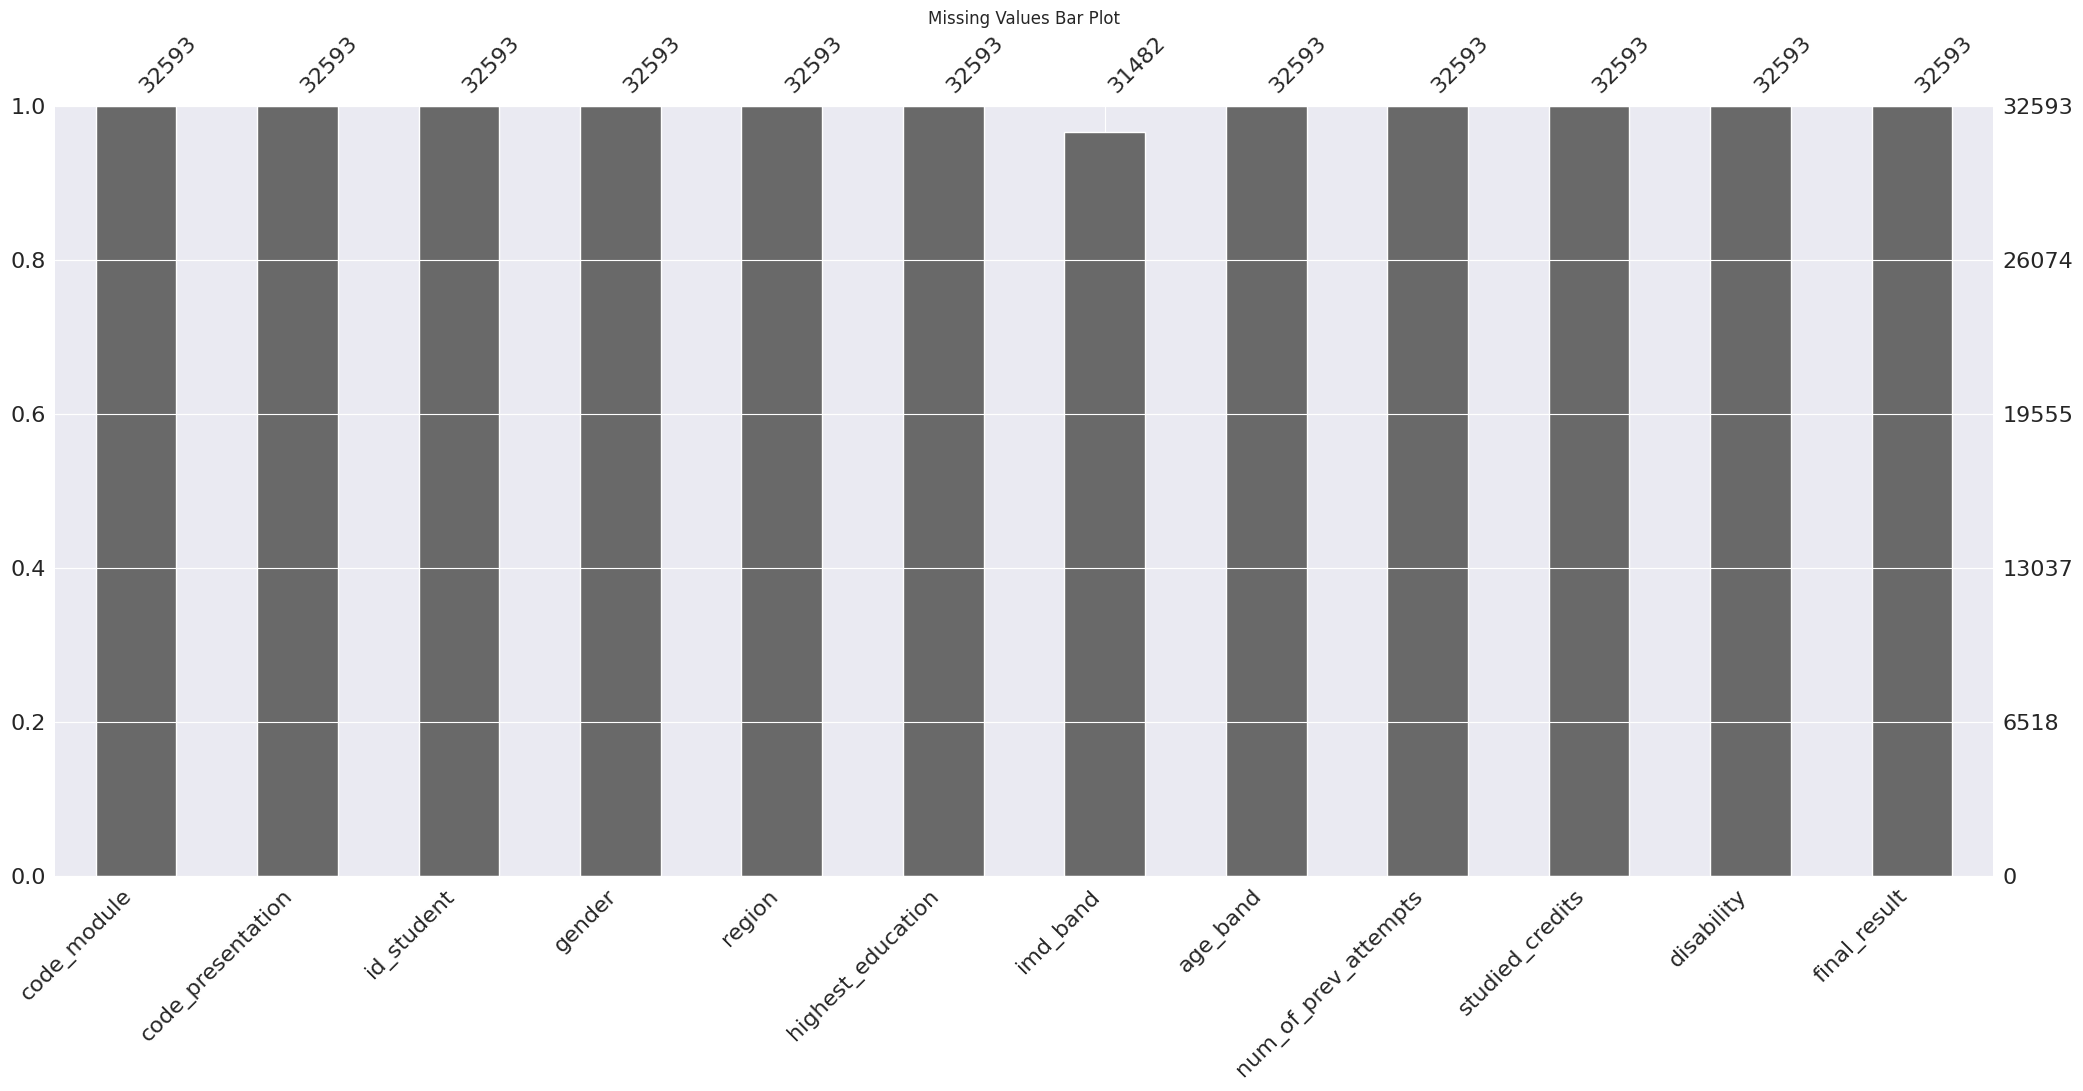

In [123]:
# Visualize missing values using a bar plot
msno.bar(oulad_studInf_df)
plt.title('Missing Values Bar Plot')
plt.show()

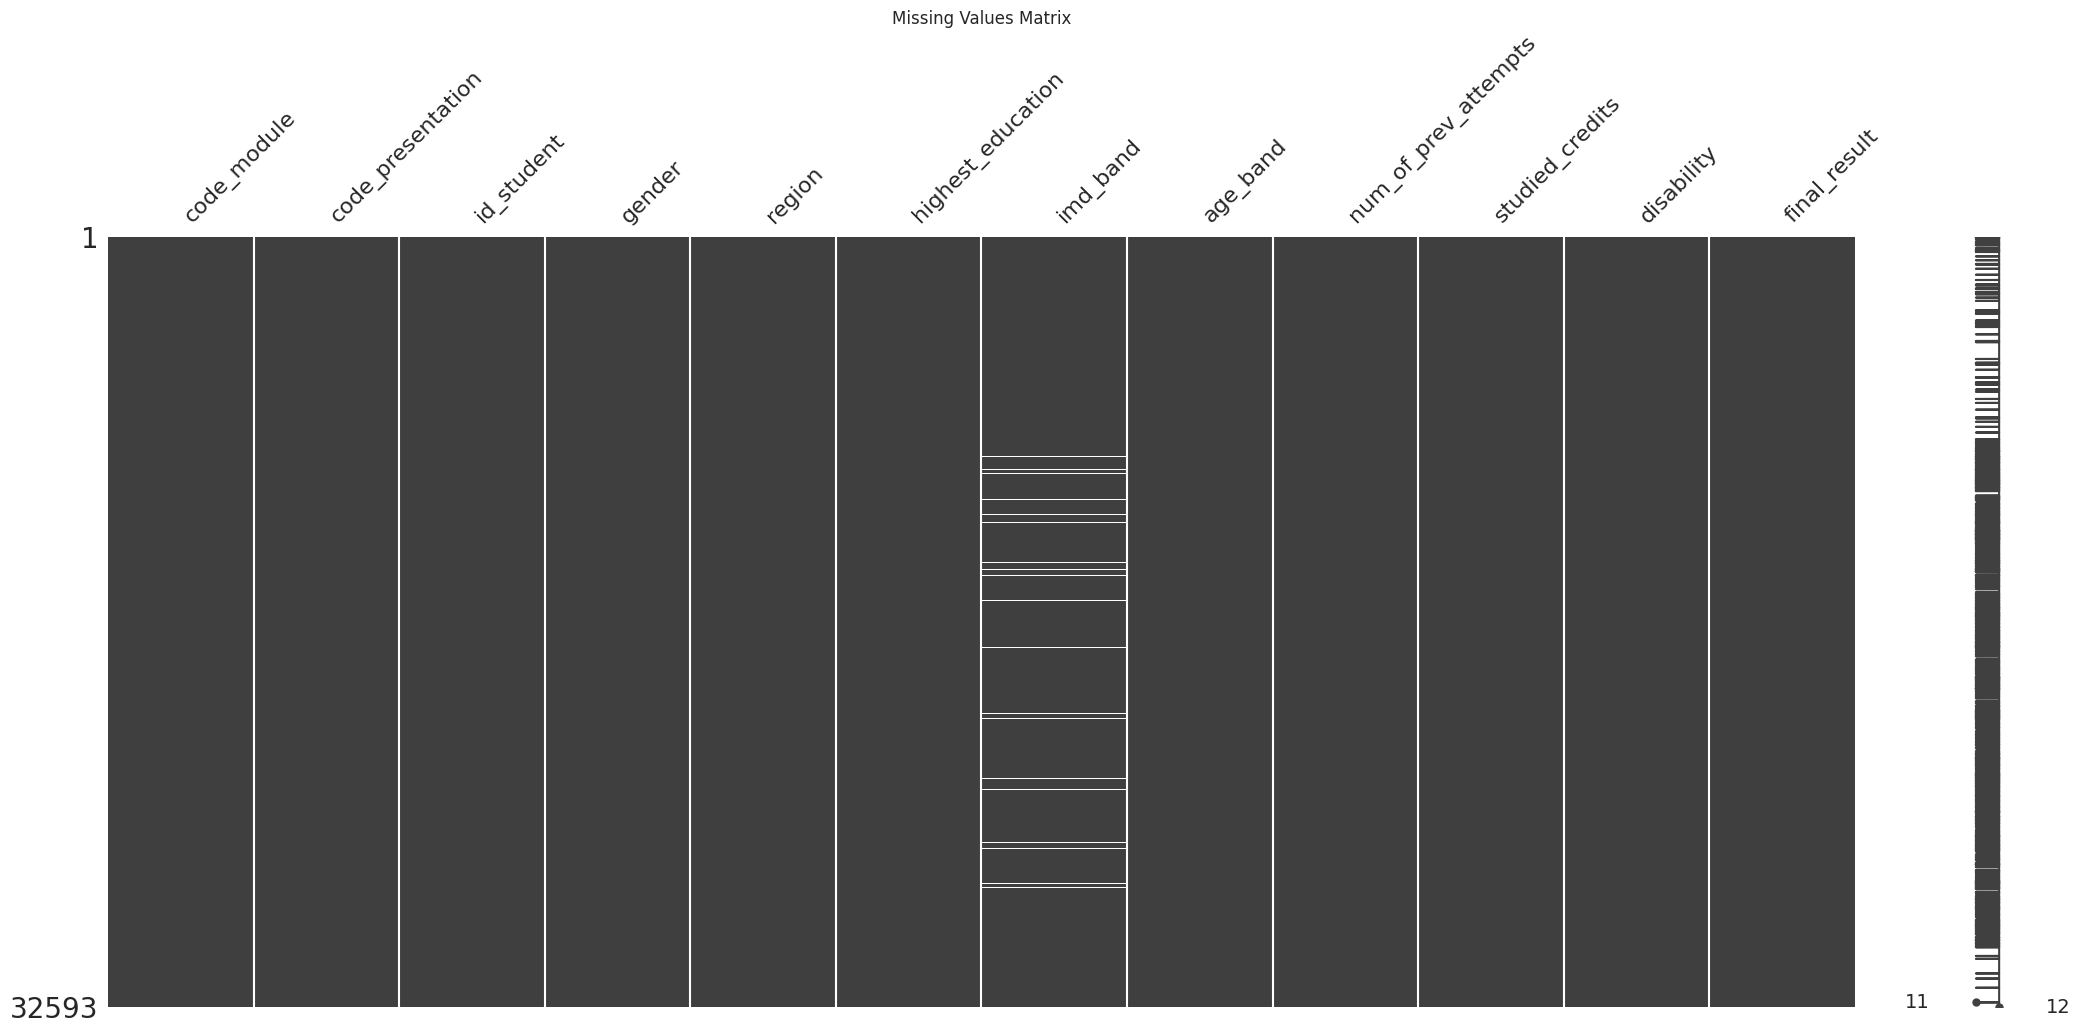

In [124]:
# Visualize missing values using a matrix plot
msno.matrix(oulad_studInf_df)
plt.title('Missing Values Matrix')
plt.show()

Imd Band includes missing values that must be handled at a later stage

<Axes: xlabel='final_result', ylabel='count'>

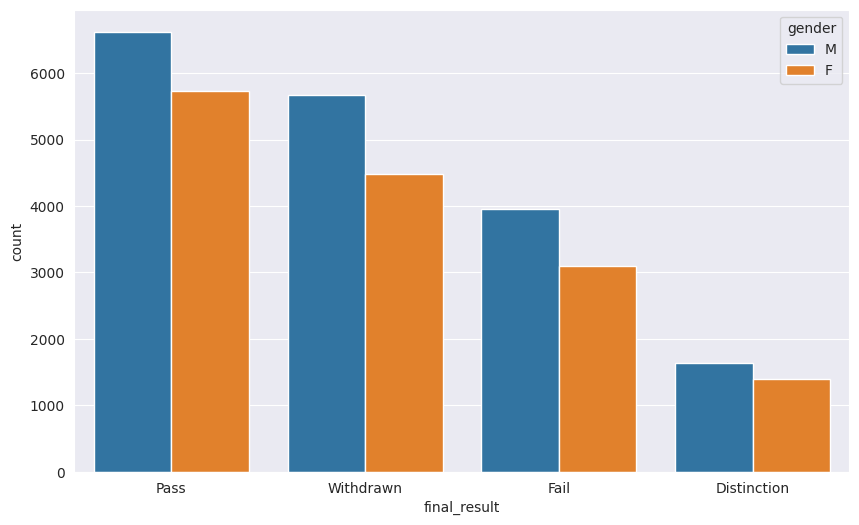

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='final_result', hue='gender', data=oulad_studInf_df.loc[:,['gender', 'final_result']])

### Probably have to deal with imbalance

<Axes: xlabel='code_module', ylabel='count'>

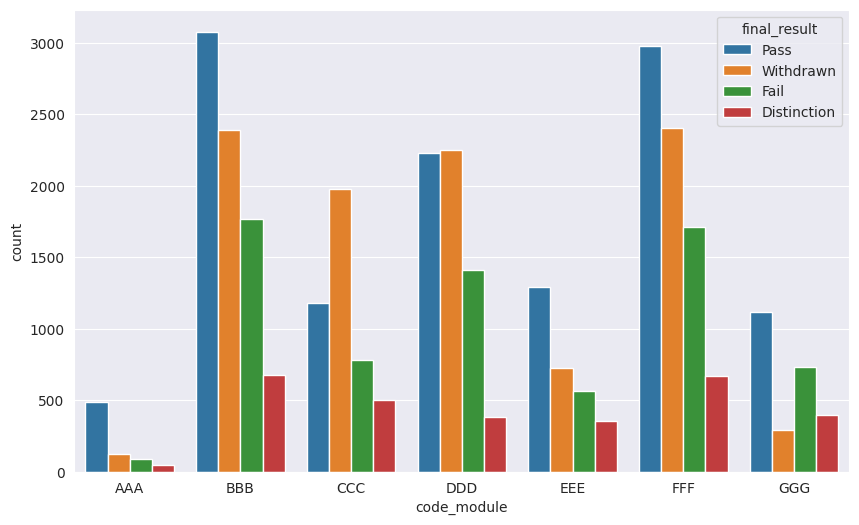

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', hue='final_result', data=oulad_studInf_df.loc[:,['code_module', 'final_result']])

In [72]:
def plot_normalized_counts(df, x_col, hue_col, count_col, plot_lines=False):
    """
    Create a bar plot with normalized counts for a given DataFrame and columns.

    Args:
        df (DataFrame): The DataFrame to use.
        x_col (str): The name of the column to use for the x-axis.
        hue_col (str): The name of the column to use for splitting the bars by hue.
        count_col (str): The name of the column to use for calculating the counts.

    Returns:
        None
    """
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(20, 6))
    # Calculate the normalized counts
    counts = (df.groupby([x_col, hue_col])[count_col]
              .count()
              .unstack()
              .fillna(0))
    counts = counts.div(counts.sum(axis=1), axis=0)

    # Melt the counts dataframe to long format
    counts = counts.reset_index().melt(id_vars=x_col)

    # Create a barplot with normalized counts
    sns.barplot(x=x_col, y='value', hue=hue_col, data=counts, ax=ax)

    if plot_lines:
      unique_hue_vals = np.unique(counts.loc[:,hue_col])
      for val in unique_hue_vals:
        # Filter the counts DataFrame for each hue value
        line_data = counts.loc[counts[hue_col] == val]

        # Plot the lineplot using seaborn
        sns.lineplot(x=x_col, y='value', data=line_data, marker='o', label=f'Line for {val}', ax=ax)
      # Add a legend
      ax.legend()
      plt.show()

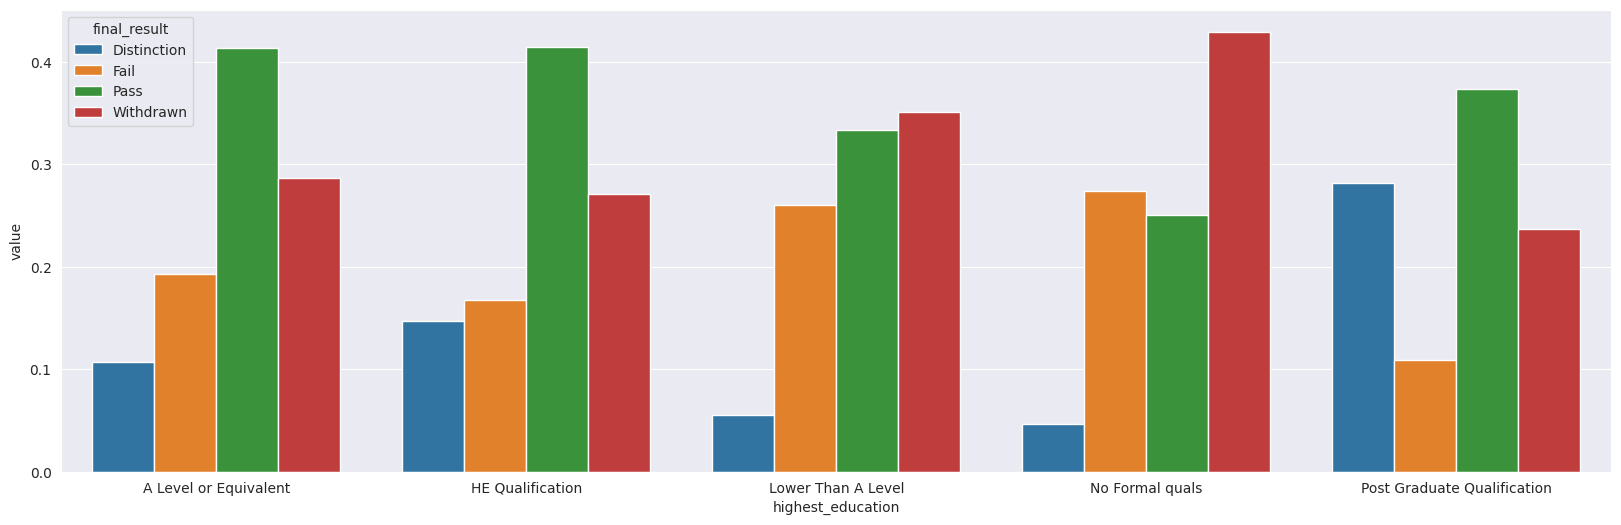

In [73]:
plot_normalized_counts(oulad_studInf_df, 'highest_education', 'final_result', 'final_result')

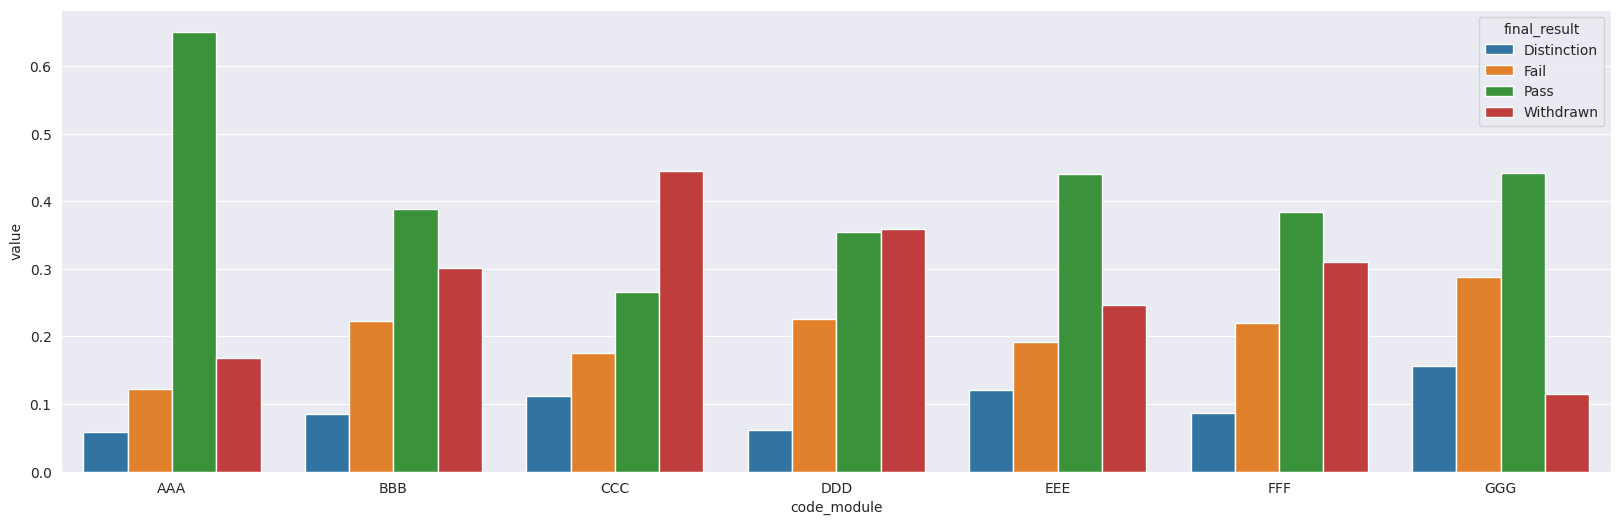

In [74]:
plot_normalized_counts(oulad_studInf_df, 'code_module', 'final_result', 'final_result')

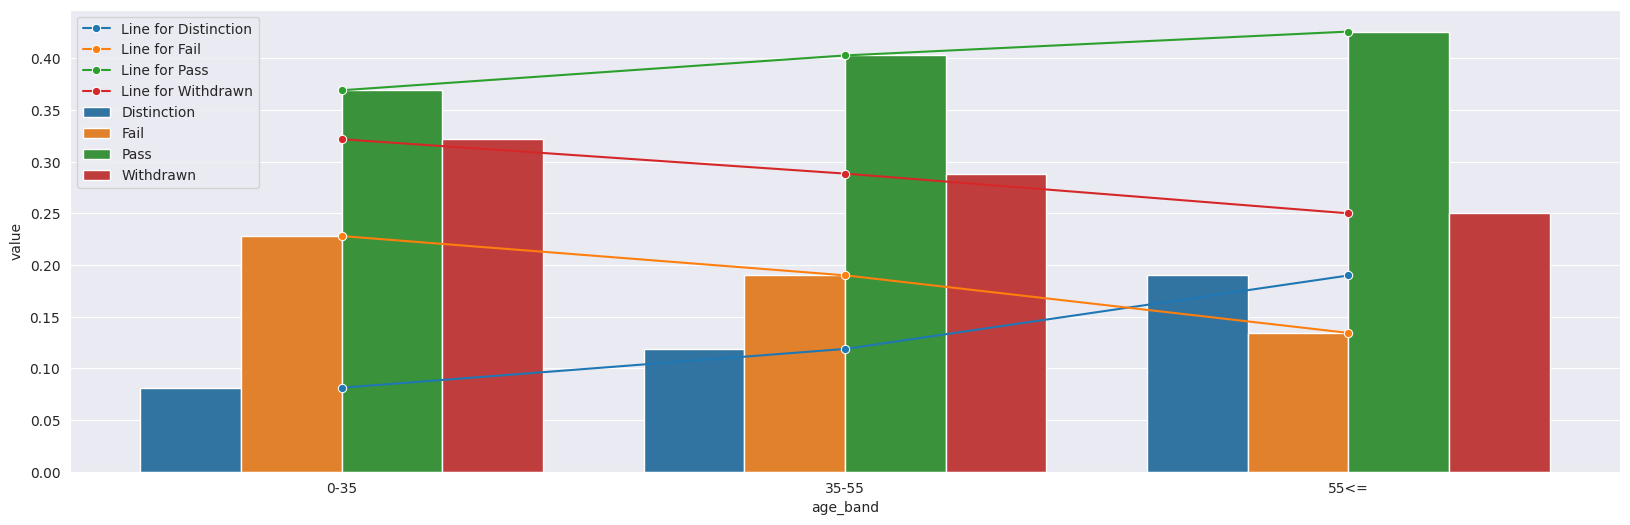

In [75]:
plot_normalized_counts(oulad_studInf_df, 'age_band', 'final_result', 'final_result', plot_lines=True)

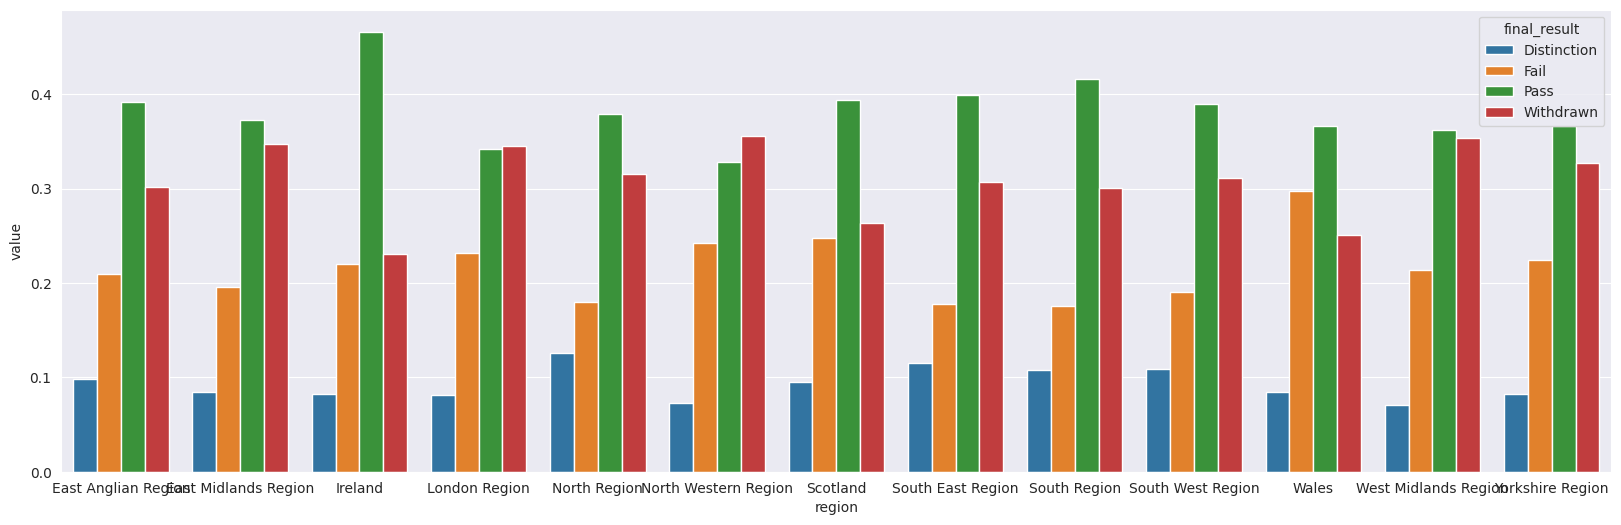

In [76]:
plot_normalized_counts(oulad_studInf_df, 'region', 'final_result', 'final_result')

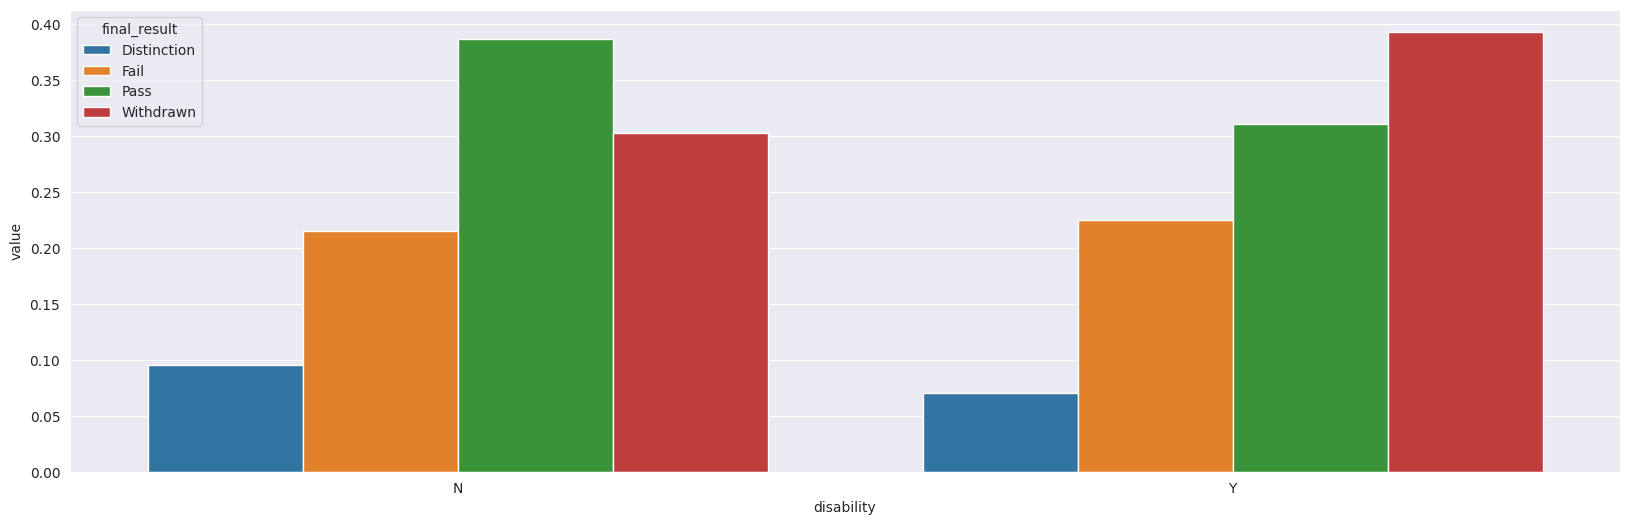

In [77]:
plot_normalized_counts(oulad_studInf_df, 'disability', 'final_result', 'final_result')

In the current English Indices of Deprivation 2019 (IoD2019) seven domains of deprivation are considered and weighted as follows,
<br>
Income. (22.5%)<br>
Employment. (22.5%)<br>
Education. (13.5%)<br>
Health. (13.5%)<br>
Crime. (9.3%)<br>
Barriers to Housing and Services. (9.3%)<br>
Living Environment. (9.3%)<br>

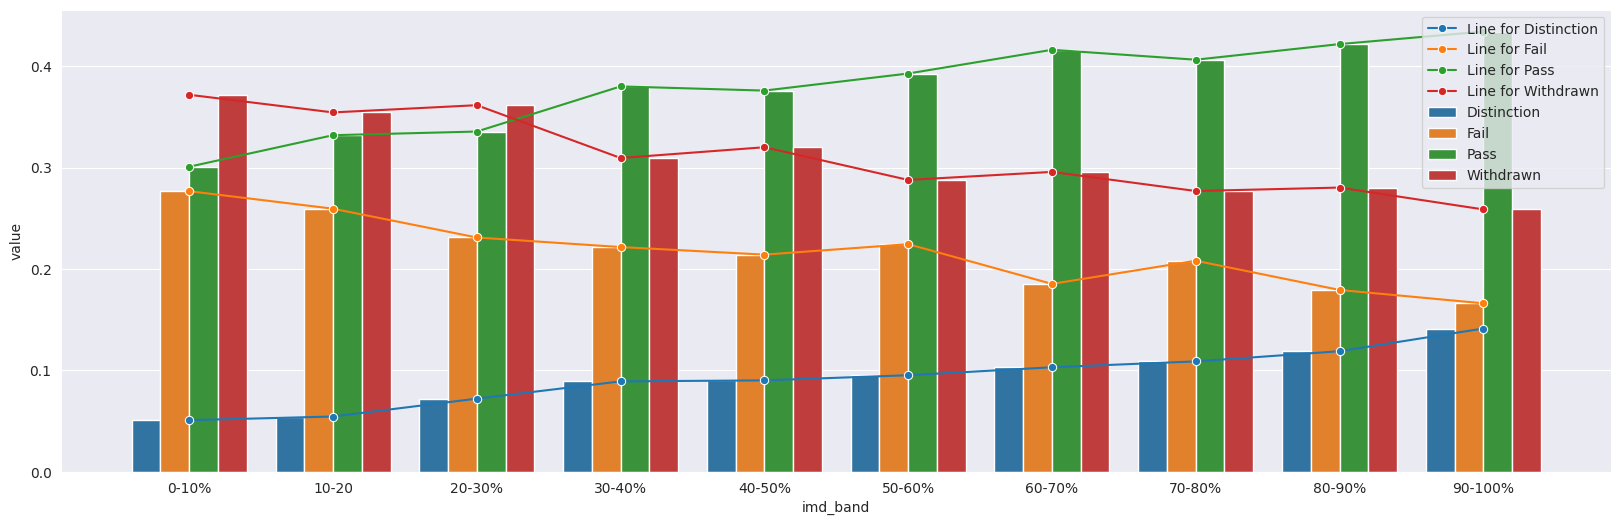

In [78]:
# (essentially a measure of poverty)
plot_normalized_counts(oulad_studInf_df, 'imd_band', 'final_result', 'final_result', plot_lines=True)

<Axes: xlabel='studied_credits', ylabel='final_result'>

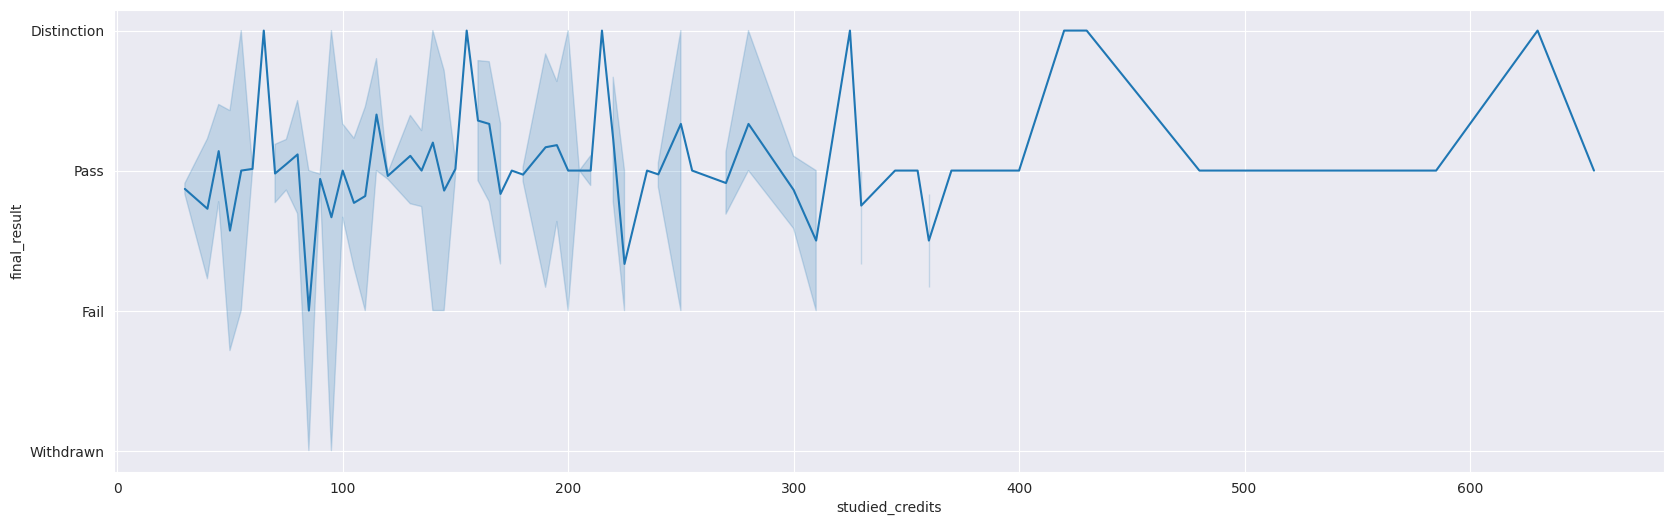

In [101]:
plt.figure(figsize=(20,6))
order = ['Distinction', 'Pass', 'Fail', 'Withdrawn']
plt.yticks(np.arange(len(order)), order)
sns.lineplot(x='studied_credits', y='final_result', data=oulad_studInf_df, hue_order=order)

# Preprocessing

In [102]:
oulad_studInf_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [103]:
oulad_studAssess_df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [105]:
# Sort the DataFrame by 'date_submitted' column in ascending order
df_sorted = oulad_studAssess_df.sort_values('date_submitted').copy()

# Keep only the first occurrence of each student ID in the given DataFrame
df_given_first_assessment = df_sorted.drop_duplicates(subset='id_student')

Taking the assumption that prediction is performed after the first assignment of the student as most of the past literature performed similar experiments.

Also including one assessment might make our models better at the prediction. (Or just make it biased towards the first assignment :) )

In [107]:
df_given_first_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
28783,15008,559381,-11,0,63.0
76237,25348,2472145,-10,0,85.0
15866,14996,610700,-9,0,75.0
109993,34865,520187,-8,0,77.0
111134,34866,529566,-8,0,84.0


In [168]:
prepro_df = oulad_studInf_df.merge(df_given_first_assessment, left_on='id_student', right_on='id_student')
prepro_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1752,22,0,70.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,1752,17,0,72.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1752,26,0,69.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,1752,19,0,79.0


In [169]:
# Set the column type to string
prepro_df['imd_band'] = prepro_df['imd_band'].astype(str)

In [170]:
# Define the dictionary mapping qualifications to numbers
qualification_order = {
    'Post Graduate Qualification': 1,
    'HE Qualification': 2,
    'A Level or Equivalent': 3,
    'Lower Than A Level': 4,
    'No Formal quals': 5
}

age_order = {
    '0-35': 1,
    '35-55': 2,
    '55<=': 3
}

imd_band_order = {
    '0-10%': 1, 
    '10-20': 2, 
    '20-30%': 3, 
    '30-40%': 4, 
    '40-50%': 5, 
    '50-60%': 6, 
    '60-70%': 7, 
    '70-80%': 8, 
    '80-90%': 9, 
    '90-100%': 10, 
    'nan': np.nan
}

final_result_order = {
    'Distinction': 1,
    'Pass': 1,
    'Withdrawn': 0,
    'Fail': 0
}

# Replace the column values according to the dictionary keys
prepro_df['highest_education'] = prepro_df['highest_education'].replace(qualification_order)
prepro_df['age_band'] = prepro_df['age_band'].replace(age_order)
prepro_df['imd_band'] = prepro_df['imd_band'].replace(imd_band_order)
prepro_df['final_result'] = prepro_df['final_result'].replace(final_result_order)
prepro_df.head(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,2,10.0,3,0,240,N,1,1752,18,0,78.0
1,AAA,2013J,28400,F,Scotland,2,3.0,2,0,60,N,1,1752,22,0,70.0
2,AAA,2013J,31604,F,South East Region,3,6.0,2,0,60,N,1,1752,17,0,72.0
3,AAA,2013J,32885,F,West Midlands Region,4,6.0,1,0,60,N,1,1752,26,0,69.0
4,AAA,2013J,38053,M,Wales,3,9.0,2,0,60,N,1,1752,19,0,79.0
5,AAA,2013J,45462,M,Scotland,2,4.0,1,0,60,N,1,1752,20,0,70.0
6,AAA,2013J,45642,F,North Western Region,3,10.0,1,0,120,N,1,1752,18,0,72.0
7,AAA,2013J,52130,F,East Anglian Region,3,8.0,1,0,90,N,1,1752,19,0,72.0
8,AAA,2013J,53025,M,North Region,1,NaN,3,0,60,N,1,1752,9,0,71.0
9,AAA,2013J,57506,M,South Region,4,8.0,2,0,60,N,1,1752,18,0,68.0


In [171]:
# remove unnecessary columns [id_student, id_assessment]
prepro_df = prepro_df.drop(columns=['id_student', 'id_assessment'])

# Remove 22 rows with NaNs in 'scores' column as those students didn't perform any assessments.
prepro_df = prepro_df.dropna(subset=['score'])

In [172]:
# Perform One Hot Encoding to columns [code_module, code_presentation, gender, disability, region]
prepro_df = pd.get_dummies(prepro_df, columns=['code_module', 'code_presentation', 'gender', 'disability', 'region'])

In [173]:
prepro_df

,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result,date_submitted,is_banked,score,code_module_AAA,...,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,2,10.0,3,0,240,1,18,0,78.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,3.0,2,0,60,1,22,0,70.0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,6.0,2,0,60,1,17,0,72.0,1,...,0,0,0,0,1,0,0,0,0,0
3,4,6.0,1,0,60,1,26,0,69.0,1,...,0,0,0,0,0,0,0,0,1,0
4,3,9.0,2,0,60,1,19,0,79.0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26741,3,9.0,1,0,30,1,60,0,80.0,0,...,0,0,0,1,0,0,0,0,0,0
26742,4,5.0,2,0,30,1,68,0,80.0,0,...,0,0,0,0,0,0,0,0,0,0
26743,3,3.0,1,0,30,1,50,0,65.0,0,...,0,0,0,0,0,1,0,0,0,0
26744,4,10.0,2,0,30,0,56,0,83.0,0,...,0,0,0,0,1,0,0,0,0,0


### Performing Split of data at this point to perform feature encodings clusterings etc by fitting only on the training data

In [185]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(prepro_df.drop(columns=['final_result']), prepro_df['final_result'], test_size=0.2, random_state=42)

In [186]:
X_train_init = X_train.copy()
X_test_init = X_test.copy()

## Fit and transform train data

In [187]:
# Perform K-Modes clustering
km_fillna = KMeans(n_clusters=10, init='k-means++', n_init=5)
km_fillna.fit(X_train.drop(columns=['imd_band']))

# Replace missing values with the mode of each cluster
X_train.loc[X_train['imd_band'].isna(),'imd_band'] = km_fillna.predict(X_train.loc[X_train['imd_band'].isna()].drop(columns=['imd_band']))

# Fit clustering model on training data to fill na values in imd_band column
km_feature = KMeans(n_clusters=5, init='k-means++', n_init=5)
clusters_feature = km_feature.fit_predict(X_train)
X_train['cluster_feature'] = clusters_feature

In [188]:
X_train

,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,date_submitted,is_banked,score,code_module_AAA,code_module_BBB,...,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,cluster_feature
26502,4,7.0,1,0,30,61,0,45.0,0,0,...,0,0,0,0,1,0,0,0,0,2
24741,4,6.0,1,0,30,72,0,70.0,0,0,...,0,0,0,0,0,0,0,0,1,2
21715,4,7.0,1,0,180,5,0,86.0,0,0,...,0,0,0,0,0,0,0,0,0,3
11029,4,9.0,2,0,60,19,0,96.0,0,0,...,0,0,0,0,1,0,0,0,0,4
3434,3,3.0,1,0,60,25,0,67.0,0,1,...,0,0,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,3,3.0,2,0,60,16,0,72.0,0,0,...,0,0,0,0,0,0,0,0,0,4
5396,3,5.0,2,0,60,15,0,1.0,0,1,...,0,0,0,0,1,0,0,0,0,1
861,3,2.0,1,2,300,18,0,65.0,0,1,...,0,0,0,0,0,0,0,0,0,3
15811,4,10.0,1,0,120,24,0,72.0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Transform test data

In [189]:
# Replace missing values with the mode of each cluster
X_test.loc[X_test['imd_band'].isna(),'imd_band'] = km_fillna.predict(X_test.loc[X_test['imd_band'].isna()].drop(columns=['imd_band']))

In [193]:
# Transform clustering model on training data to fill na values in imd_band column
X_test['cluster_feature'] = km_feature.predict(X_test)

# Perform Prediction

In [218]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(random_state=42),
        'Gaussian Naive Bayes': GaussianNB(),
        'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
        'Multi-Layer Perceptron': MLPClassifier(random_state=42),
        # Add more models as needed
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f"Model: {model_name}")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-Score:", f1)
        print("Confusion Matrix:")
        print(cm)
        print("----------------------------------")

        # Create a DataFrame from the confusion matrix
        cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

        # Create a heatmap of the confusion matrix
        plt.figure(figsize=(10, 6))
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()


Model: Logistic Regression
Accuracy: 0.6900617630544638
Precision: 0.6990856192851206
Recall: 0.8157129000969933
F1-Score: 0.7529095792300806
Confusion Matrix:
[[1164 1086]
 [ 570 2523]]
----------------------------------


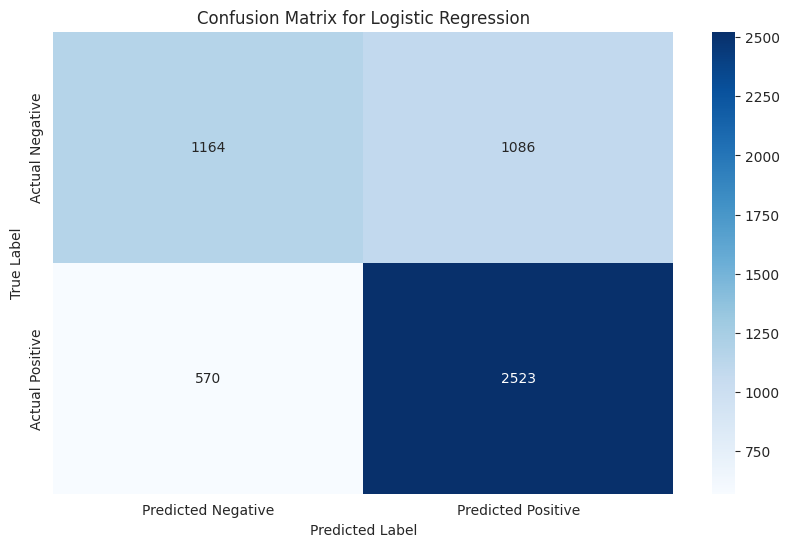

Model: Random Forest
Accuracy: 0.6953022646453303
Precision: 0.7192457348099371
Recall: 0.7769156159068865
F1-Score: 0.7469692259869444
Confusion Matrix:
[[1312  938]
 [ 690 2403]]
----------------------------------


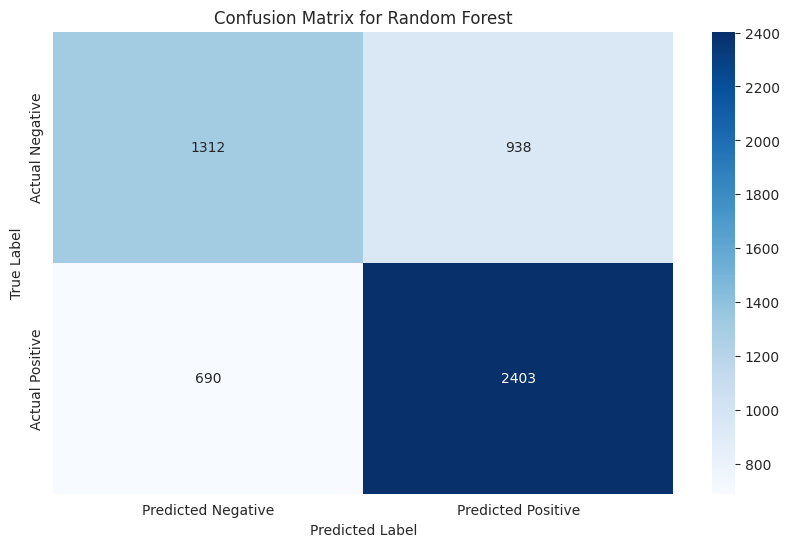

Model: Gradient Boosting
Accuracy: 0.7095264832491109
Precision: 0.712551724137931
Recall: 0.8351115421920465
F1-Score: 0.7689788627567727
Confusion Matrix:
[[1208 1042]
 [ 510 2583]]
----------------------------------


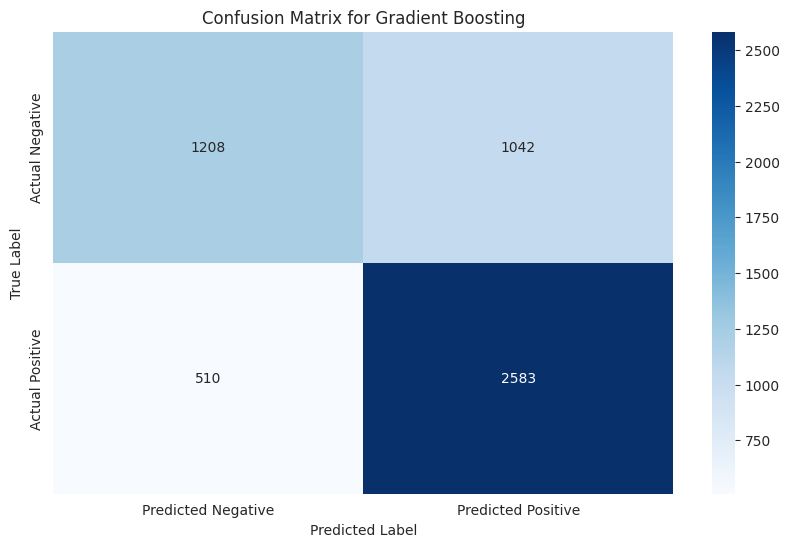

Model: Decision Tree
Accuracy: 0.6260527793374508
Precision: 0.6884681583476764
Recall: 0.6466214031684449
F1-Score: 0.6668889629876626
Confusion Matrix:
[[1345  905]
 [1093 2000]]
----------------------------------


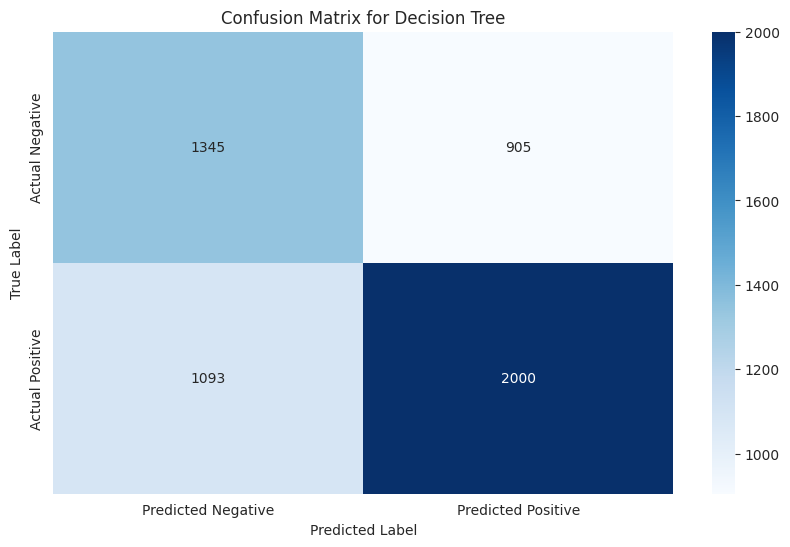

Model: K-Nearest Neighbors
Accuracy: 0.6421486056522553
Precision: 0.6824219956750077
Recall: 0.7141933397995474
F1-Score: 0.6979462875197473
Confusion Matrix:
[[1222 1028]
 [ 884 2209]]
----------------------------------


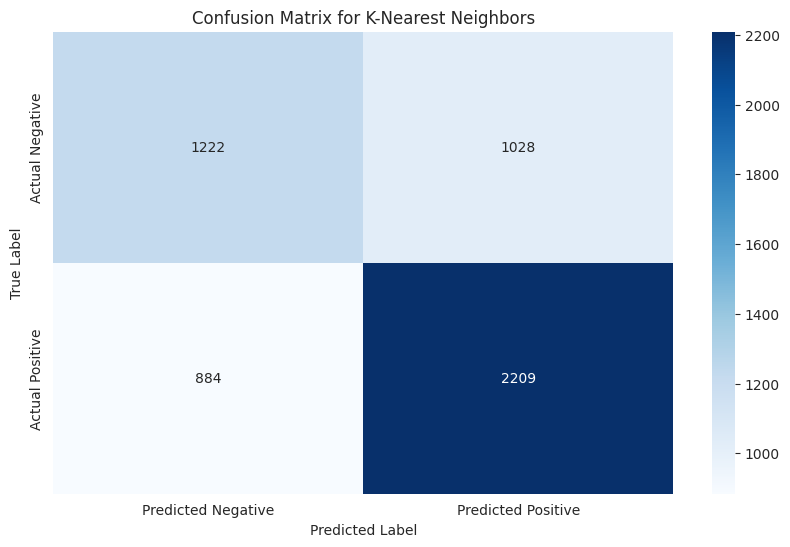

Model: Support Vector Machine
Accuracy: 0.6490735541830432
Precision: 0.6510416666666666
Recall: 0.8486905916585838
F1-Score: 0.7368421052631579
Confusion Matrix:
[[ 843 1407]
 [ 468 2625]]
----------------------------------


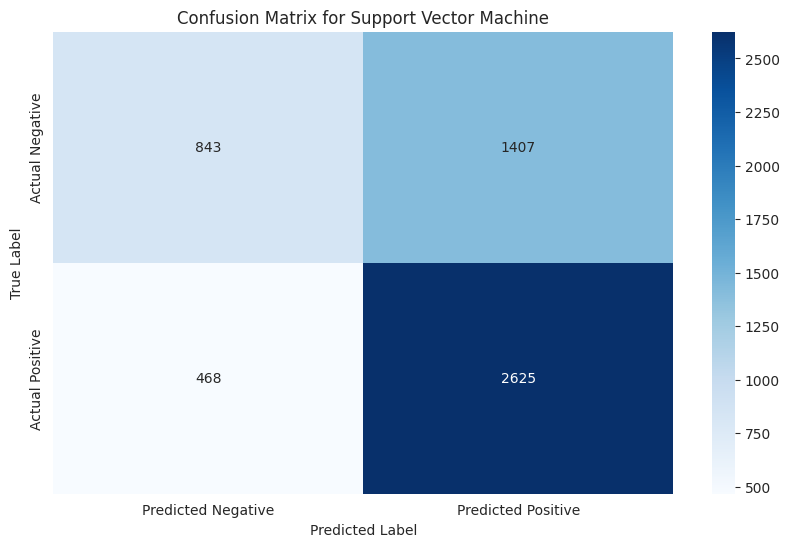

Model: Gaussian Naive Bayes
Accuracy: 0.6393411940857197
Precision: 0.6648755656108597
Recall: 0.760103459424507
F1-Score: 0.7093075878714739
Confusion Matrix:
[[1065 1185]
 [ 742 2351]]
----------------------------------


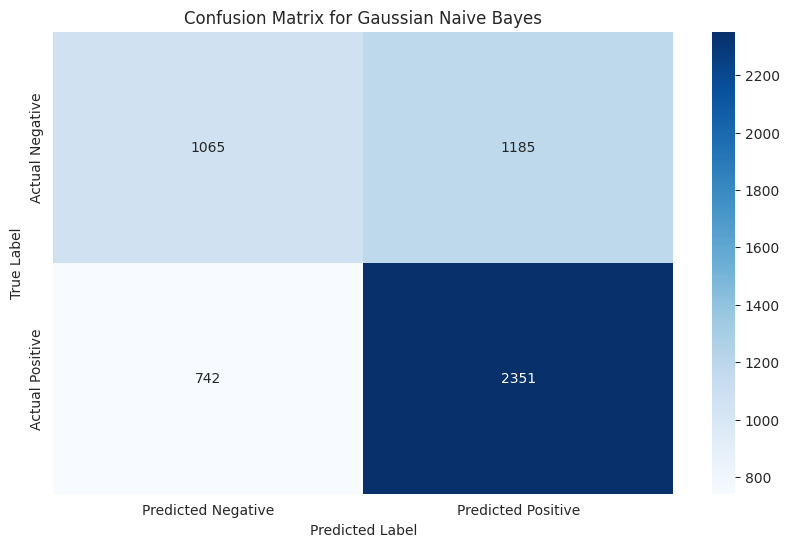

Model: Linear Discriminant Analysis
Accuracy: 0.6861313868613139
Precision: 0.6936542669584245
Recall: 0.8199159392175881
F1-Score: 0.7515187435175581
Confusion Matrix:
[[1130 1120]
 [ 557 2536]]
----------------------------------


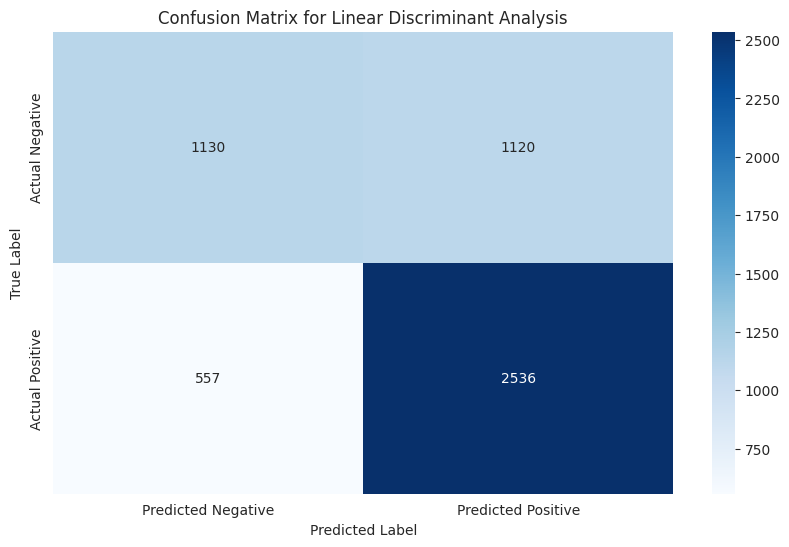

Model: Multi-Layer Perceptron
Accuracy: 0.7012914093206064
Precision: 0.7157682329201499
Recall: 0.8027804720336243
F1-Score: 0.7567814690643097
Confusion Matrix:
[[1264  986]
 [ 610 2483]]
----------------------------------


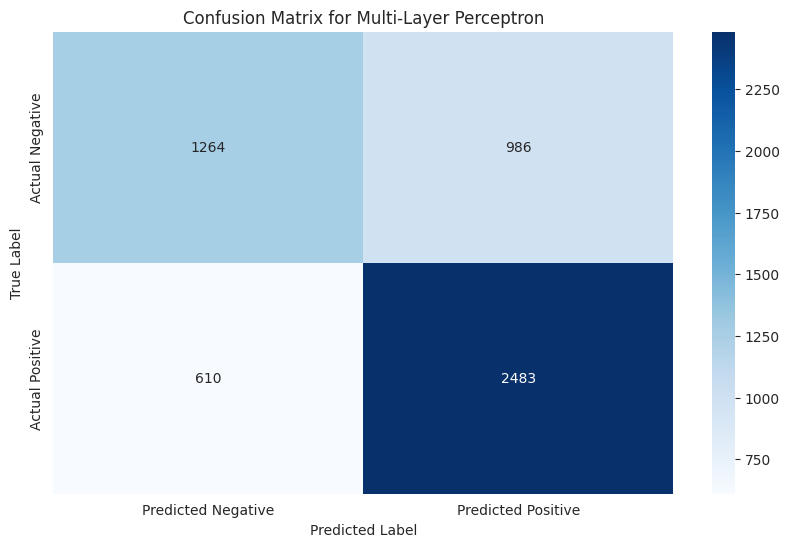

In [219]:
train_and_evaluate_models(X_train, X_test, y_train, y_test)

# TODO 

- ## Handle Imbalance in target class
- ## Use cost function for training. We want to be better predicting the students who will fail